In [1]:
import qiskit as q
from qiskit.tools.visualization import plot_bloch_multivector,plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit import IBMQ
from matplotlib import style
import math
style.use("classic")

state_sim = q.Aer.get_backend("statevector_simulator")
qasm_sim = q.Aer.get_backend("qasm_simulator")

IBMQ.load_account()



<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [2]:
def do_job(circuit):
    statevec = q.execute(circuit, backend=state_sim).result().get_statevector()
    
    circuit.measure([i for i in range(circuit.num_qubits)],[i for i in range(len(circuit.clbits))])
    
    counts = q.execute(circuit, backend=qasm_sim,shots=1024).result().get_counts()
    
    return statevec, counts

# Hedamard Gate workings


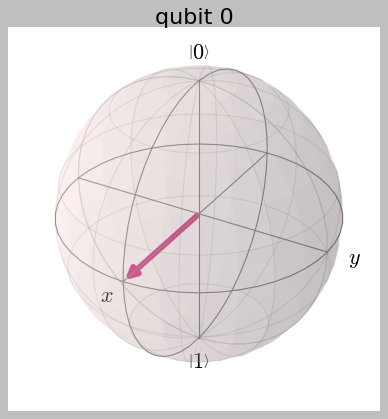

In [3]:
o = q.QuantumCircuit(1,1)
o.h(0)
sv=q.execute(o, backend=state_sim).result().get_statevector()
plot_bloch_multivector(sv)

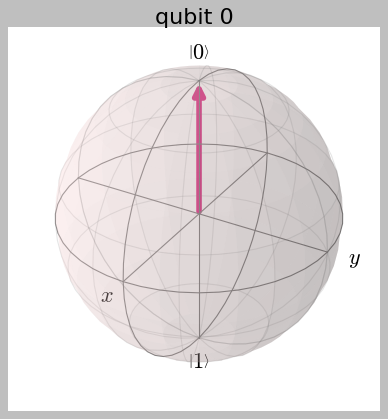

In [4]:
o = q.QuantumCircuit(1,1)
o.h(0)
o.h(0)
sv=q.execute(o, backend=state_sim).result().get_statevector()
plot_bloch_multivector(sv)

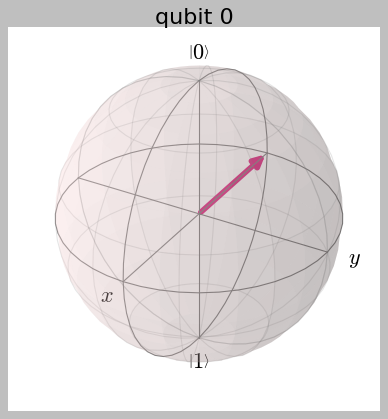

In [5]:
o = q.QuantumCircuit(1,1)
o.x(0)
o.h(0)
sv=q.execute(o, backend=state_sim).result().get_statevector()
plot_bloch_multivector(sv)

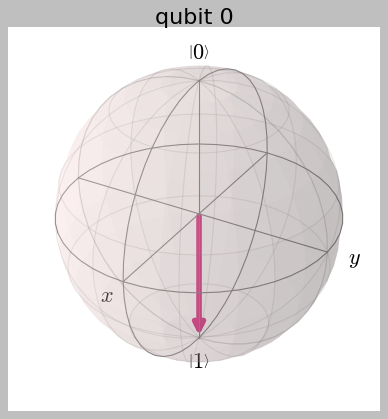

In [6]:
o = q.QuantumCircuit(1,1)
o.x(0)
o.h(0)
o.h(0)
sv=q.execute(o, backend=state_sim).result().get_statevector()
plot_bloch_multivector(sv)

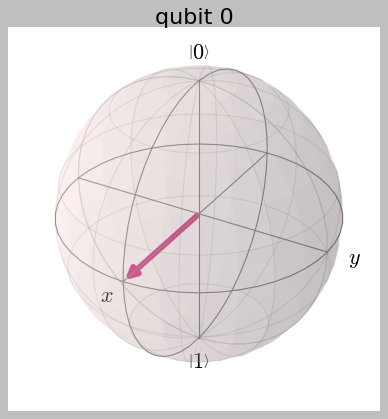

In [7]:
o = q.QuantumCircuit(1,1)
o.h(0)
o.x(0)
sv=q.execute(o, backend=state_sim).result().get_statevector()
plot_bloch_multivector(sv)

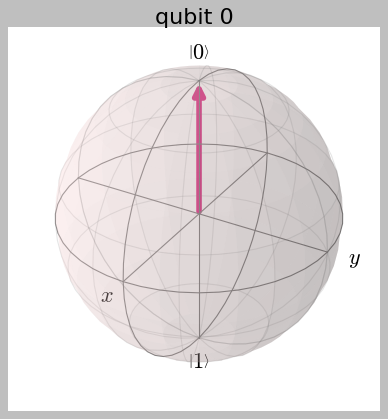

In [8]:
o = q.QuantumCircuit(1,1)
o.h(0)
o.x(0)
o.h(0)
sv=q.execute(o, backend=state_sim).result().get_statevector()
plot_bloch_multivector(sv)

# Unbalanced Circuits

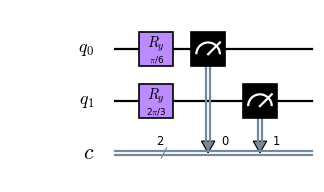

In [9]:
c1 = q.QuantumCircuit(2,2)
c1.ry(math.pi/6,0)
c1.ry(math.pi*2/3,1)
statevec1, counts1 = do_job(c1)
c1.draw(output="mpl")

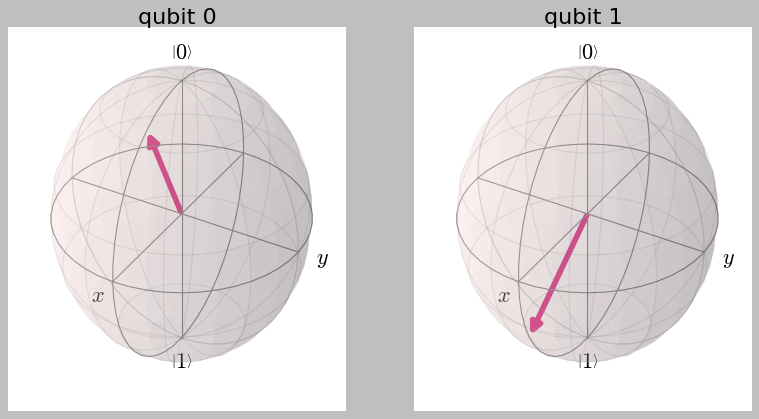

In [10]:
plot_bloch_multivector(statevec1)

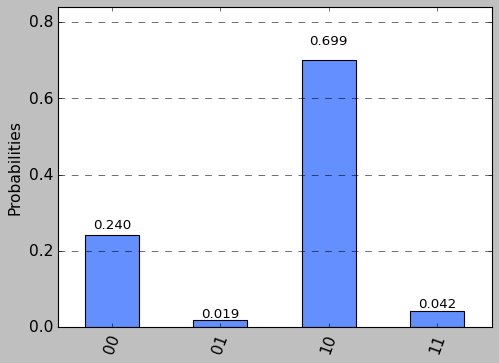

In [11]:
plot_histogram([counts1])

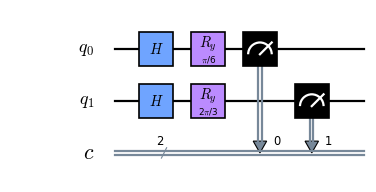

In [12]:
hc1 = q.QuantumCircuit(2,2)
hc1.h(0)
hc1.h(1)
hc1.ry(math.pi/6,0)
hc1.ry(math.pi*2/3,1)
hstatevec1, hcounts1 = do_job(hc1)
hc1.draw(output="mpl")

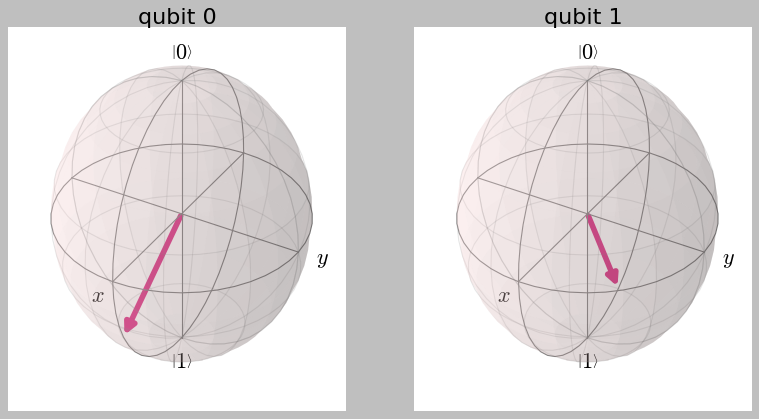

In [13]:
plot_bloch_multivector(hstatevec1)

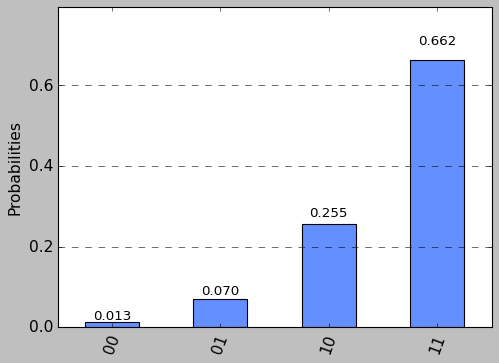

In [14]:
plot_histogram([hcounts1])

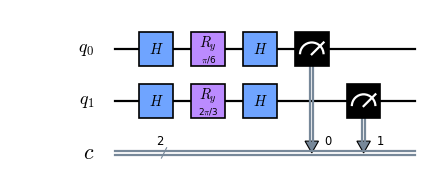

In [15]:
hc1h = q.QuantumCircuit(2,2)
hc1h.h(0)
hc1h.h(1)
hc1h.ry(math.pi/6,0)
hc1h.ry(math.pi*2/3,1)
hc1h.h(0)
hc1h.h(1)
hstatevec1h, hcounts1h = do_job(hc1h)
hc1h.draw(output="mpl")

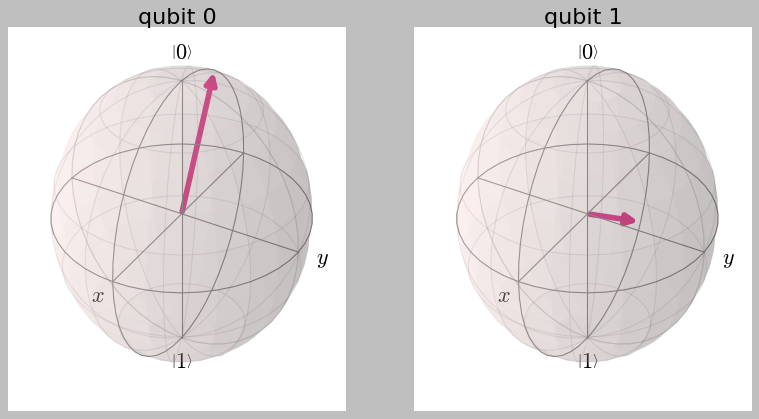

In [16]:
plot_bloch_multivector(hstatevec1h)

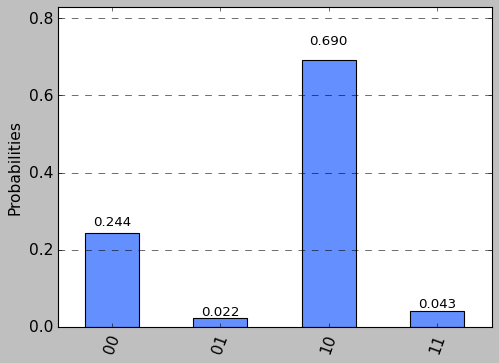

In [17]:
plot_histogram([hcounts1h])

# Deutsch-Josza Problem

We are given a hidden Boolean function  f , which takes as input a string of bits, and returns either  0  or  1 , that is:

f({x0,x1,x2,...})→0 or 1 , where xn is 0 or 1
 
The property of the given Boolean function is that it is guaranteed to either be balanced or constant. A constant function returns all  0 's or all  1 's for any input, while a balanced function returns  0 's for exactly half of all inputs and  1 's for the other half. Our task is to determine whether the given function is balanced or constant.

Note that the Deutsch-Josza problem is an  n -bit extension of the single bit Deutsch problem.



# Constant Circuits


In [18]:
#will add the when i can think of an example circuit

# Balanced Circuits

In [19]:
def balanced_black_box1(c):
    #Equivalent to xor gate
    c.cx(1,0)   
    c.cx(2,0)
    return c
def balanced_black_box2(c):
    #constant circuit i/p=o/p
    return c
def balanced_black_box3(c):
    #constant circuit i/p!=o/p
    c.x(0)
    return c
def balanced_black_box4(c):
    #4 bit Xor 
    c.cx(1,0)   
    c.cx(2,0)
    c.cx(3,0)
    return c

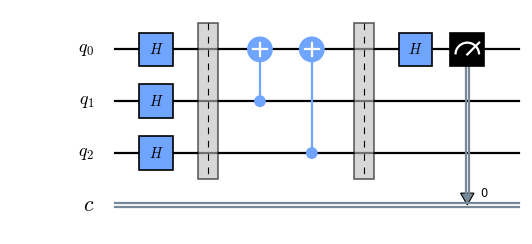

In [20]:
cb1 = q.QuantumCircuit(3,1)
cb1.h(0)
cb1.h(1)
cb1.h(2)
cb1.barrier()
cb1 = balanced_black_box1(cb1)
cb1.barrier()
cb1.h(0)
#cb1.h(1)
cb1.measure([0],[0])
cb1.draw(output="mpl")


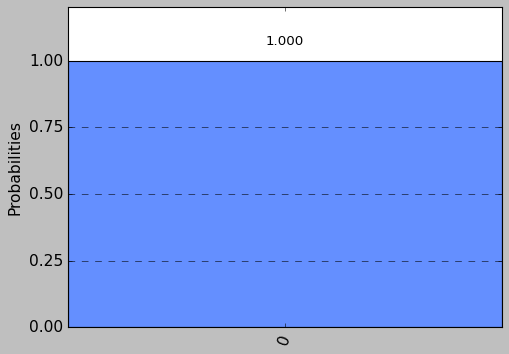

In [21]:
countsb1 = q.execute(cb1, backend=qasm_sim,shots=1024).result().get_counts()
plot_histogram([countsb1])

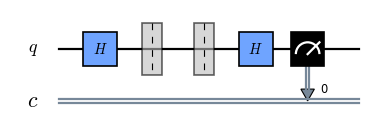

In [22]:
cb2 = q.QuantumCircuit(1,1)
cb2.h(0)
cb2.barrier()
cb2 = balanced_black_box2(cb2)
cb2.barrier()
cb2.h(0)
cb2.measure([0],[0])
cb2.draw(output="mpl")

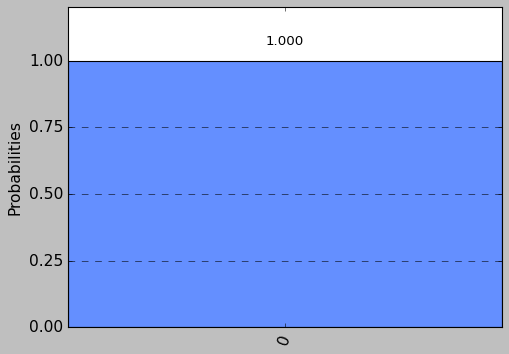

In [23]:
countsb2 = q.execute(cb2, backend=qasm_sim,shots=1024).result().get_counts()
plot_histogram([countsb2])

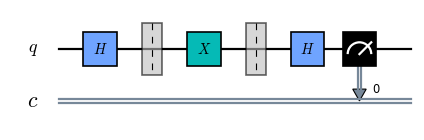

In [24]:
cb3 = q.QuantumCircuit(1,1)
cb3.h(0)
cb3.barrier()
cb3 = balanced_black_box3(cb3)
cb3.barrier()
cb3.h(0)
cb3.measure([0],[0])
cb3.draw(output="mpl")

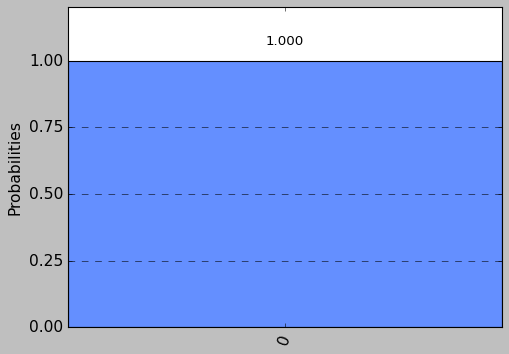

In [25]:
countsb3 = q.execute(cb3, backend=qasm_sim,shots=1024).result().get_counts()
plot_histogram([countsb3])

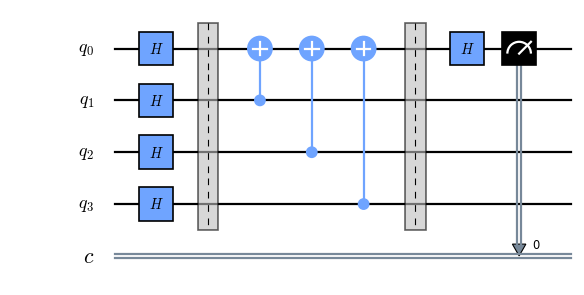

In [26]:
cb4 = q.QuantumCircuit(4,1)
cb4.h(0)
cb4.h(1)
cb4.h(2)
cb4.h(3)
cb4.barrier()
cb4 = balanced_black_box4(cb4)
cb4.barrier()
cb4.h(0)
#cb4.h(1)
cb4.measure([0],[0])
cb4.draw(output="mpl")

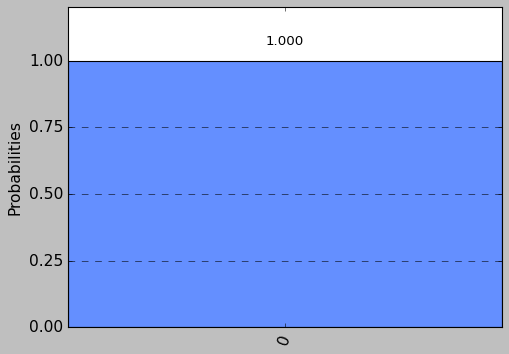

In [27]:
countsb4 = q.execute(cb4, backend=qasm_sim,shots=1024).result().get_counts()
plot_histogram([countsb4])